 # Power Load Prediction for West Zone - VARMA Model
 
 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")

In [3]:
power_data_west['End Date Time'] = pd.to_datetime(power_data_west['End Date Time'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['End Date Time'])

In [4]:
plot_df_west = pd.DataFrame(power_data_west, columns=['Peak Demand', 'Avg. Temperature', 'End Date Time'])

In [5]:
plot_df_west['End Date Time'].min()

Timestamp('2019-01-29 00:15:00')

In [6]:
plot_df_west['End Date Time'].max()

Timestamp('2022-01-27 00:00:00')

In [7]:
power_data_west['month'] = power_data_west['End Date Time'].dt.strftime('%b')

In [8]:
power_data_west['day_of_week'] = power_data_west['End Date Time'].dt.day_name()

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['End Date Time'].dt.date.astype('datetime64').isin(holidays)

In [10]:
power_data_west.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [11]:
power_data_west.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,NaN,1161.6,KW,Jan,Thursday,False


In [12]:
power_data_west.describe()

,Usage,Cost,Currency Unit,Avg. Temperature,Peak Demand
count,104724.000000,0.0,0.0,104716.000000,104724.000000
mean,309.636443,NaN,NaN,67.377211,1238.545770
std,75.557612,NaN,NaN,16.591545,302.230457
min,0.000000,NaN,NaN,29.000000,0.000000
25%,252.000000,NaN,NaN,54.000000,1008.000000
50%,308.000000,NaN,NaN,66.000000,1232.000000
75%,368.000000,NaN,NaN,79.000000,1472.000000
max,531.200000,NaN,NaN,114.000000,2124.800000


In [13]:
power_data_west.shape

(104736, 15)

In [14]:
power_data_west.dtypes

Service Agreement            object
Start Date Time              object
End Date Time        datetime64[ns]
Usage                       float64
Usage Unit                   object
Cost                        float64
Currency Unit               float64
Avg. Temperature            float64
Temperature Unit             object
Event Flags                  object
Peak Demand                 float64
Demand Unit                  object
month                        object
day_of_week                  object
holiday                        bool
dtype: object

In [15]:
#For checking missing values in dataset
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                    12
Usage Unit               12
Cost                 104736
Currency Unit        104736
Avg. Temperature         20
Temperature Unit          0
Event Flags          104730
Peak Demand              12
Demand Unit              12
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [16]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Service Agreement         0
Start Date Time           0
End Date Time             0
Usage                     0
Usage Unit                0
Cost                 104736
Currency Unit        104736
Avg. Temperature          0
Temperature Unit          0
Event Flags            3840
Peak Demand               0
Demand Unit               0
month                     0
day_of_week               0
holiday                   0
dtype: int64

In [17]:
zero_usage_df = power_data_west.loc[power_data_west['Peak Demand'] == 0]
zero_usage_df.count()

Service Agreement    50
Start Date Time      50
End Date Time        50
Usage                50
Usage Unit           50
Cost                  0
Currency Unit         0
Avg. Temperature     50
Temperature Unit     50
Event Flags          50
Peak Demand          50
Demand Unit          50
month                50
day_of_week          50
holiday              50
dtype: int64

dataset.kW.plot()

## VARMA Model

In [18]:
varma_data = power_data_west[(power_data_west['End Date Time'] > '2019-01-01') & (power_data_west['End Date Time'] < '2022-02-01')]

In [19]:
varma_data.head(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
0,west,1/29/19 0:00,2019-01-29 00:15:00,211.2,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,844.8,KW,Jan,Tuesday,False
1,west,1/29/19 0:15,2019-01-29 00:30:00,210.4,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,841.6,KW,Jan,Tuesday,False
2,west,1/29/19 0:30,2019-01-29 00:45:00,208.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,832.0,KW,Jan,Tuesday,False
3,west,1/29/19 0:45,2019-01-29 01:00:00,212.0,KWH,NaN,NaN,54.0,FAHRENHEIT,NaN,848.0,KW,Jan,Tuesday,False
4,west,1/29/19 1:00,2019-01-29 01:15:00,203.2,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,812.8,KW,Jan,Tuesday,False
5,west,1/29/19 1:15,2019-01-29 01:30:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
6,west,1/29/19 1:30,2019-01-29 01:45:00,205.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,822.4,KW,Jan,Tuesday,False
7,west,1/29/19 1:45,2019-01-29 02:00:00,208.8,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,835.2,KW,Jan,Tuesday,False
8,west,1/29/19 2:00,2019-01-29 02:15:00,217.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,870.4,KW,Jan,Tuesday,False
9,west,1/29/19 2:15,2019-01-29 02:30:00,229.6,KWH,NaN,NaN,55.0,FAHRENHEIT,NaN,918.4,KW,Jan,Tuesday,False


In [20]:
varma_data.tail(10)

,Service Agreement,Start Date Time,End Date Time,Usage,Usage Unit,Cost,Currency Unit,Avg. Temperature,Temperature Unit,Event Flags,Peak Demand,Demand Unit,month,day_of_week,holiday
104726,west,1/26/22 21:30,2022-01-26 21:45:00,284.0,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1136.0,KW,Jan,Wednesday,False
104727,west,1/26/22 21:45,2022-01-26 22:00:00,288.8,KWH,NaN,NaN,52.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104728,west,1/26/22 22:00,2022-01-26 22:15:00,301.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1206.4,KW,Jan,Wednesday,False
104729,west,1/26/22 22:15,2022-01-26 22:30:00,280.0,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1120.0,KW,Jan,Wednesday,False
104730,west,1/26/22 22:30,2022-01-26 22:45:00,296.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1187.2,KW,Jan,Wednesday,False
104731,west,1/26/22 22:45,2022-01-26 23:00:00,282.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1129.6,KW,Jan,Wednesday,False
104732,west,1/26/22 23:00,2022-01-26 23:15:00,288.8,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1155.2,KW,Jan,Wednesday,False
104733,west,1/26/22 23:15,2022-01-26 23:30:00,289.6,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1158.4,KW,Jan,Wednesday,False
104734,west,1/26/22 23:30,2022-01-26 23:45:00,294.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1177.6,KW,Jan,Wednesday,False
104735,west,1/26/22 23:45,2022-01-27 00:00:00,290.4,KWH,NaN,NaN,51.0,FAHRENHEIT,Daylight Savings,1161.6,KW,Jan,Thursday,False


In [23]:
varma_data_mod = varma_data[['Peak Demand', 'Avg. Temperature']].copy() 

In [24]:
varma_data_mod.head(10)

,Peak Demand,Avg. Temperature
0,844.8,54.0
1,841.6,54.0
2,832.0,54.0
3,848.0,54.0
4,812.8,55.0
5,822.4,55.0
6,822.4,55.0
7,835.2,55.0
8,870.4,55.0
9,918.4,55.0


In [45]:
import statsmodels.api as sm
import seaborn as sns

def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    #y.plot(ax=hist_ax, kind='hist', bins=25)
    #hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return ts_ax, acf_ax, pacf_ax

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


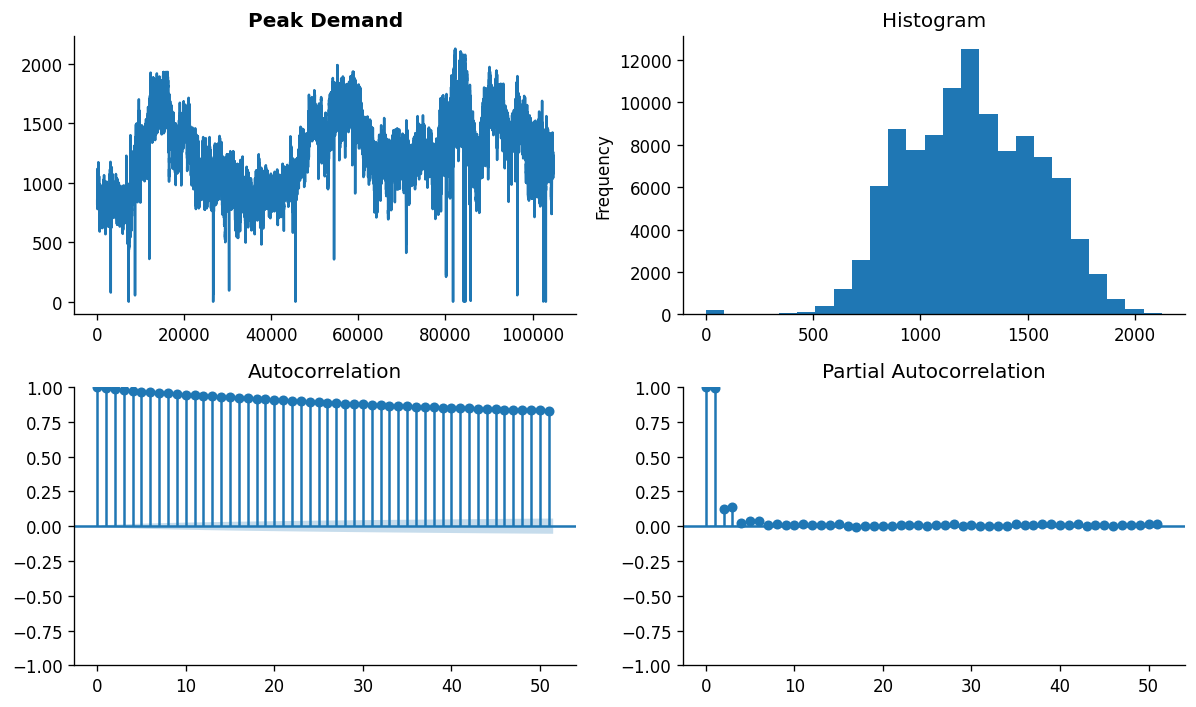

(<AxesSubplot:title={'center':'Peak Demand'}>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

In [34]:
tsplot(varma_data_mod['Peak Demand'], 'Peak Demand')

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


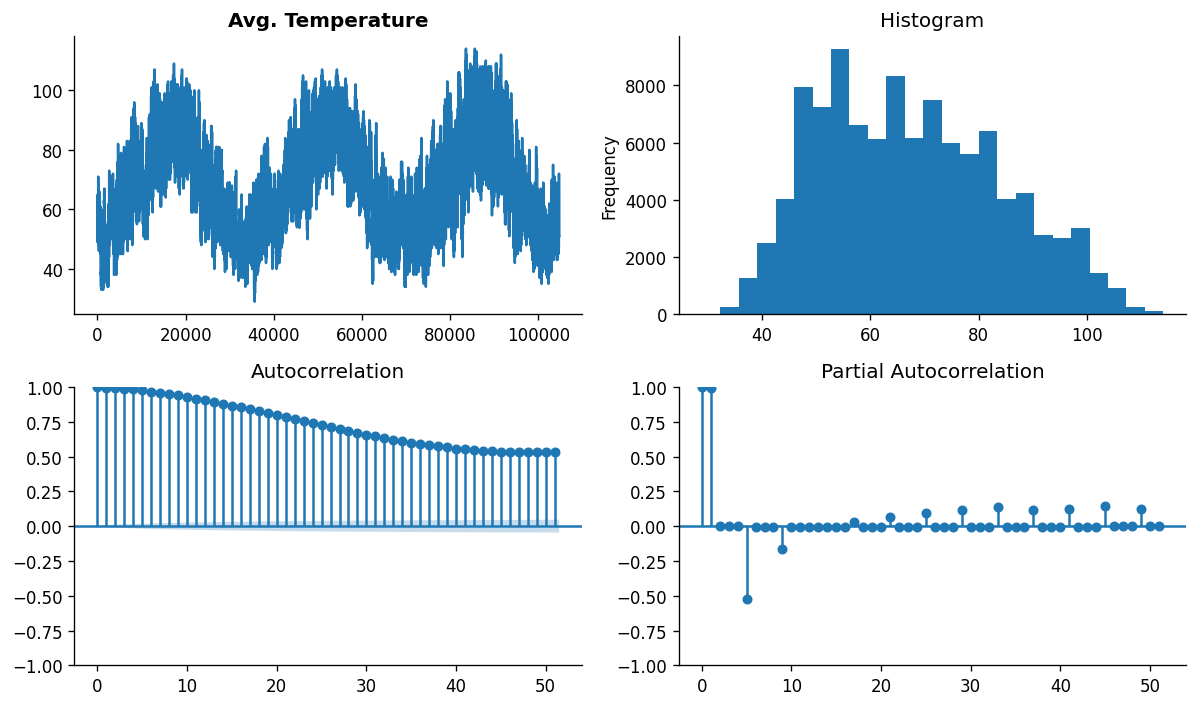

(<AxesSubplot:title={'center':'Avg. Temperature'}>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

In [35]:
tsplot(varma_data_mod['Avg. Temperature'], 'Avg. Temperature')

In [62]:
varma_transformed = varma_data_mod.copy()
varma_transformed['Peak Demand'] = np.log(varma_data_mod.iloc[:, 0]).diff(1)
#varma_transformed['Avg. Temperature'] = np.log(varma_data_mod.iloc[:, 1]).diff(3540)
varma_transformed['Avg. Temperature'] = np.log(varma_data_mod.iloc[:, 1]).diff(96)

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
varma_transformed.head(10)

,Peak Demand,Avg. Temperature
0,NaN,NaN
1,-0.003795,NaN
2,-0.011472,NaN
3,0.019048,NaN
4,-0.042396,NaN
5,0.011742,NaN
6,0.000000,NaN
7,0.015444,NaN
8,0.041282,NaN
9,0.053680,NaN


In [64]:
varma_transformed.shape

(104736, 2)

In [65]:
varma_transformed_updated = varma_transformed[1:]
varma_transformed_updated.shape

(104735, 2)

In [66]:
varma_transformed_updated.head(10)

,Peak Demand,Avg. Temperature
1,-0.003795,NaN
2,-0.011472,NaN
3,0.019048,NaN
4,-0.042396,NaN
5,0.011742,NaN
6,0.000000,NaN
7,0.015444,NaN
8,0.041282,NaN
9,0.053680,NaN
10,-0.014035,NaN


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


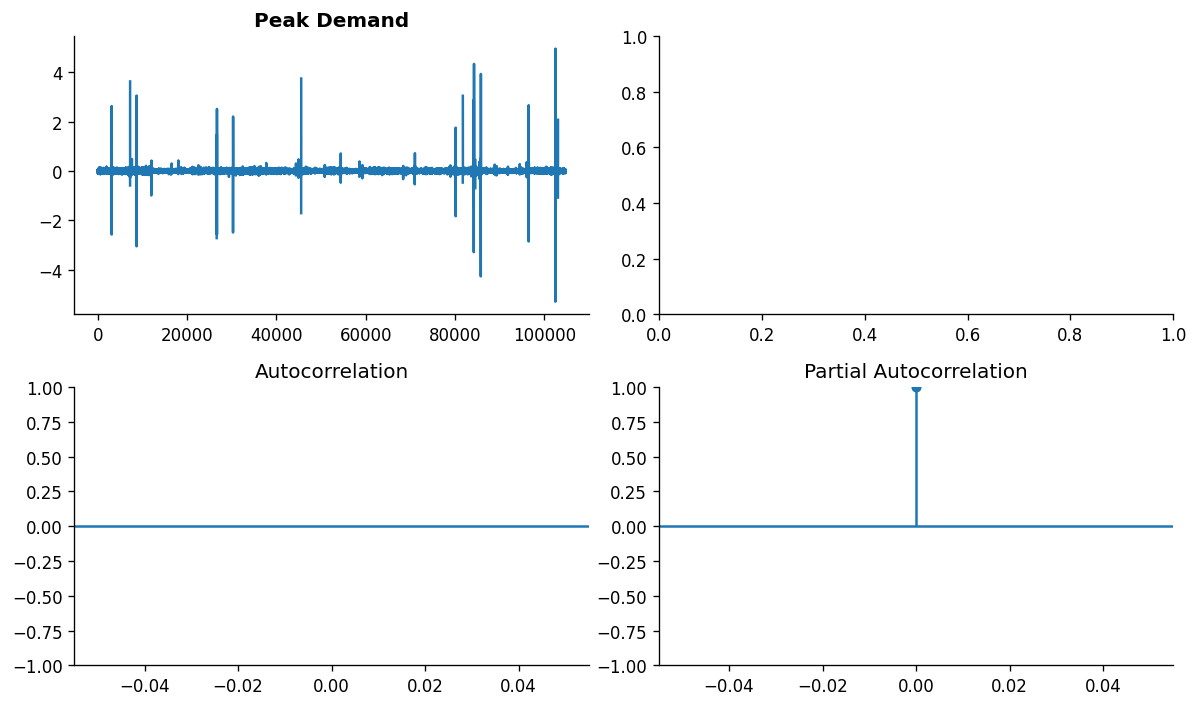

(<AxesSubplot:title={'center':'Peak Demand'}>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

In [67]:
tsplot(varma_transformed_updated['Peak Demand'], 'Peak Demand')

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


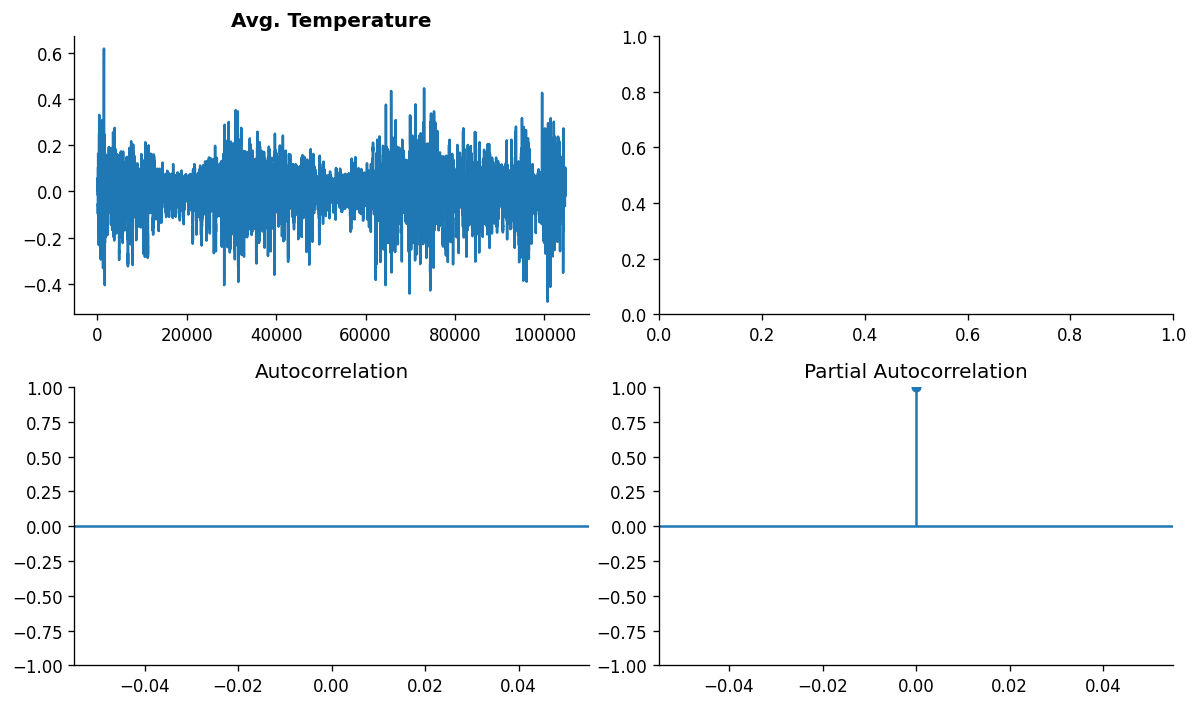

(<AxesSubplot:title={'center':'Avg. Temperature'}>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

In [68]:
tsplot(varma_transformed_updated['Avg. Temperature'], 'Avg. Temperature')

In [72]:
varma_train = varma_data_mod[:70000]
varma_test = varma_data_mod[70000:]

In [73]:
varma_train.shape

(70000, 2)

In [74]:
varma_test.shape

(34736, 2)

In [77]:
for i in range(5):
    i = i+1
    for j in range(5):
        varma_model = sm.tsa.VARMAX(varma_train[['Peak Demand', 'Avg. Temperature']], order=(i, j), trend='c')
        varma_model_result = varma_model.fit(maxiter=1000, disp=False)

        print('AR = ', i , 'MA =  ', j)
        print('AIC: ', varma_model_result.aic)
        print('BIC: ', varma_model_result.bic)
        print('HQIC: ', varma_model_result.hqic)

AR =  1 MA =   0
AIC:  956981.1140466846
BIC:  957063.5203013739
HQIC:  957006.5300453468


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  1 MA =   1
AIC:  954303.6233790804
BIC:  954422.6546358538
HQIC:  954340.3353771482


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  1 MA =   2
AIC:  952796.7765533047
BIC:  952952.4328121623
HQIC:  952844.784550778


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  1 MA =   3
AIC:  952796.4990702845
BIC:  952988.7803312262
HQIC:  952855.8030671632


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  1 MA =   4
AIC:  940811.8086720298
BIC:  941040.7149350556
HQIC:  940882.4086683139
AR =  2 MA =   0
AIC:  955153.0482727686
BIC:  955272.079529542
HQIC:  955189.7602708364


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  2 MA =   1
AIC:  951626.060636742
BIC:  951781.7168955996
HQIC:  951674.0686342153


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  2 MA =   2
AIC:  949124.4652051675
BIC:  949316.7464661092
HQIC:  949183.7692020462


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR =  2 MA =   3
AIC:  939175.720085283
BIC:  939404.6263483089
HQIC:  939246.3200815672


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  2 MA =   4
AIC:  940790.8805940112
BIC:  941056.411859121
HQIC:  940872.7765897008
AR =  3 MA =   0
AIC:  953172.9818971072
BIC:  953328.6381559648
HQIC:  953220.9898945804


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  3 MA =   1
AIC:  949662.0477627398
BIC:  949854.3290236815
HQIC:  949721.3517596185


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  3 MA =   2
AIC:  937075.8738237261
BIC:  937304.7800867519
HQIC:  937146.4738200102


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR =  3 MA =   3
AIC:  935020.9770690529
BIC:  935286.5083341628
HQIC:  935102.8730647425


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


KeyboardInterrupt: 

In [80]:
print('Start Training Final Model')
final_varma_model = sm.tsa.VARMAX(varma_train[['Peak Demand', 'Avg. Temperature']], order=(3, 3), trend='c')
final_varma_model_result = varma_model.fit(maxiter=1000, disp=False)

print('AR = ', i , 'MA =  ', j)
print('AIC: ', final_varma_model_result.aic)
print('BIC: ', final_varma_model_result.bic)
print('HQIC: ', final_varma_model_result.hqic)

Start Training Final Model


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


AR =  3 MA =   4
AIC:  939548.1993511809
BIC:  939850.355618375
HQIC:  939641.391346276


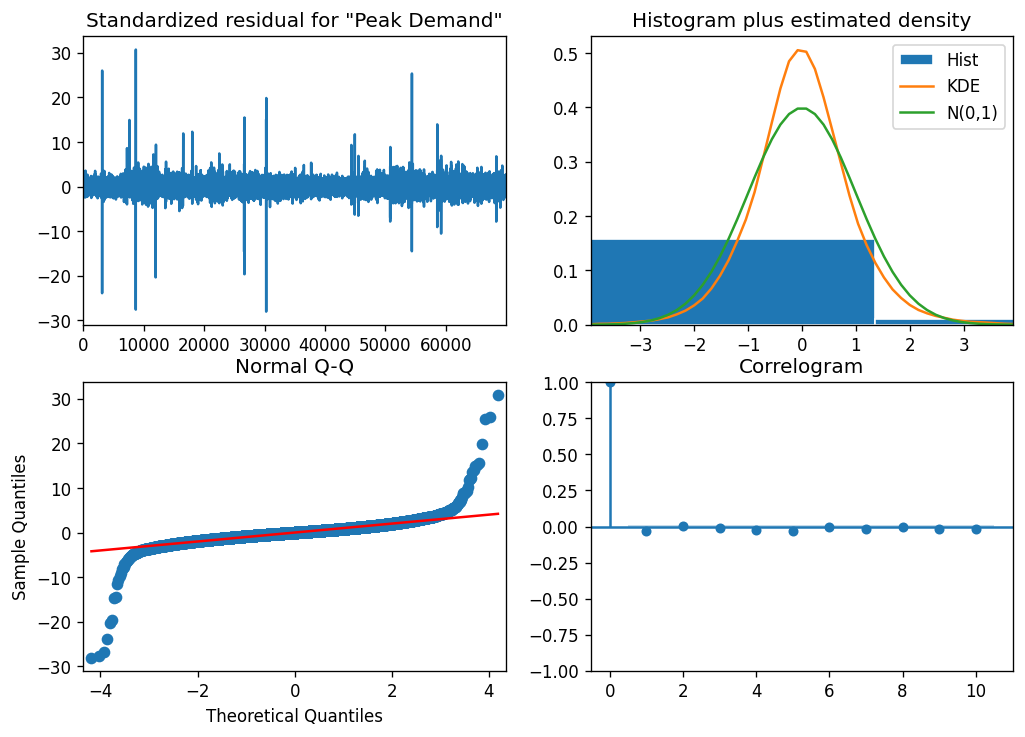

In [88]:
final_varma_model_result.plot_diagnostics()
plt.show()

In [111]:
prediction_4 = final_varma_model_result.forecast(steps=4)
prediction_np_4 =prediction_4['Peak Demand'].to_numpy()
prediction_np_4

array([1182.74817247, 1179.51074722, 1179.90475787, 1180.79537163])

In [112]:
actual_np_4 =varma_test['Peak Demand'].head(4).to_numpy()
actual_np_4

array([1158.4, 1097.6, 1110.4, 1142.4])

In [98]:
final_varma_model_result.save('./varmamodel')

In [124]:
final_df_4 = pd.concat([pd.DataFrame(actual_np_4, columns = ['Actual Peak Demand']), pd.DataFrame(prediction_np_4, columns = ['Predicted Peak Demand'])], axis=1)
final_df_4

,Actual Peak Demand,Predicted Peak Demand
0,1158.4,1182.748172
1,1097.6,1179.510747
2,1110.4,1179.904758
3,1142.4,1180.795372


<AxesSubplot:>

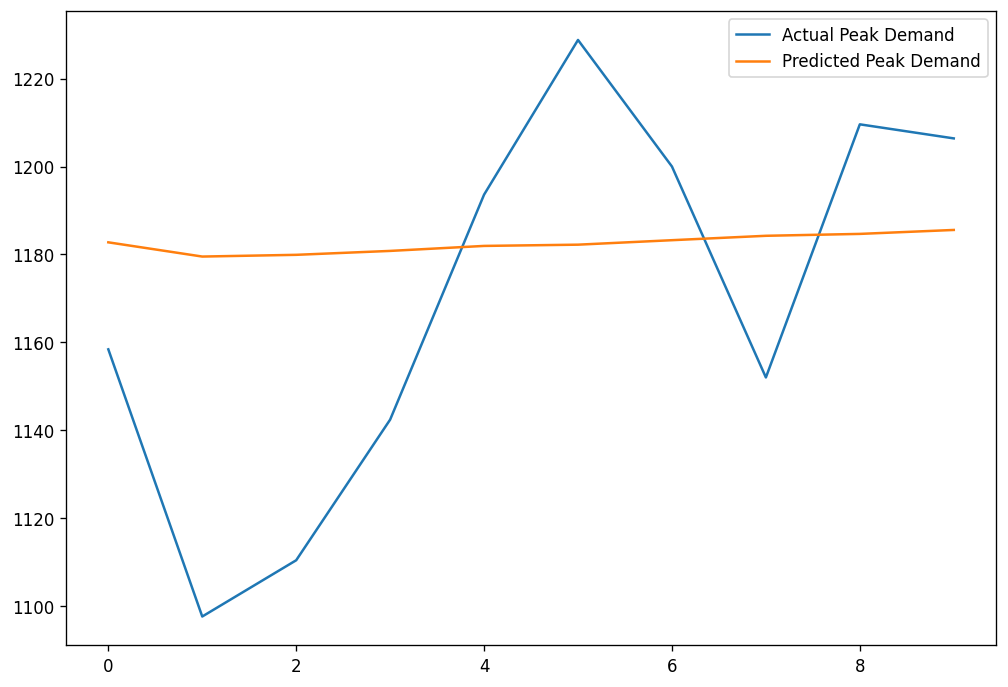

In [114]:
final_df_4.plot()

In [105]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

In [108]:
mean_absolute_error_var = mean_absolute_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mean_absolute_percentage_error_var = mean_absolute_percentage_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
mse_error_var = mse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])
rmse_error_var = rmse_error(final_df['Actual Peak Demand'], final_df['Predicted Peak Demand'])

In [110]:
print('4 Step Ahead Forecast')
print('MAPE: ' , mean_absolute_percentage_error_var)
print('MAE: ', mean_absolute_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

4 Step Ahead Forecast
MAPE:  3.193733958421386
MAE:  36.71820491111616
MSE:  1828.9612878218636
RMSE:  42.76635696224152


In [120]:
prediction_24 = final_varma_model_result.forecast(steps=96)
prediction_np_24 =prediction_24['Peak Demand'].to_numpy()
prediction_np_24

array([1182.74817247, 1179.51074722, 1179.90475787, 1180.79537163,
       1181.93158285, 1182.21521785, 1183.23434284, 1184.23563535,
       1184.66666867, 1185.56482322, 1186.57792467, 1186.99454334,
       1187.85790351, 1188.79038751, 1189.22808745, 1190.0060517 ,
       1190.88082891, 1191.29951816, 1192.00844841, 1192.80604181,
       1193.20669501, 1193.83880326, 1194.56408963, 1194.93574492,
       1195.49732388, 1196.14868706, 1196.49003629, 1196.98355643,
       1197.56508176, 1197.87382356, 1198.30486352, 1198.82003526,
       1199.0965988 , 1199.4701596 , 1199.92388547, 1200.16909688,
       1200.49073731, 1200.88792436, 1201.1034942 , 1201.37849906,
       1201.72428396, 1201.91219738, 1202.14571145, 1202.44508131,
       1202.6075727 , 1202.80439262, 1203.06215886, 1203.20151185,
       1203.36608701, 1203.58677058, 1203.70525612, 1203.84164184,
       1204.02944631, 1204.12924733, 1204.24111024, 1204.39989284,
       1204.48306992, 1204.57369259, 1204.70696246, 1204.77542

In [121]:
actual_np_24 =varma_test['Peak Demand'].head(96).to_numpy()
actual_np_24

array([1158.4, 1097.6, 1110.4, 1142.4, 1193.6, 1228.8, 1200. , 1152. ,
       1209.6, 1206.4, 1225.6, 1174.4, 1155.2, 1174.4, 1142.4, 1126.4,
       1171.2, 1152. , 1164.8, 1174.4, 1142.4, 1142.4, 1168. , 1177.6,
       1200. , 1171.2, 1142.4, 1164.8, 1152. , 1184. , 1193.6, 1203.2,
       1193.6, 1241.6, 1273.6, 1228.8, 1296. , 1270.4, 1299.2, 1308.8,
       1331.2, 1318.4, 1315.2, 1273.6, 1302.4, 1302.4, 1334.4, 1276.8,
       1212.8, 1219.2, 1270.4, 1324.8, 1305.6, 1382.4, 1369.6, 1321.6,
       1331.2, 1324.8, 1254.4, 1241.6, 1222.4, 1251.2, 1289.6, 1299.2,
       1305.6, 1267.2, 1267.2, 1260.8, 1280. , 1302.4, 1241.6, 1238.4,
       1286.4, 1289.6, 1238.4, 1302.4, 1302.4, 1273.6, 1190.4, 1238.4,
       1267.2, 1344. , 1344. , 1270.4, 1257.6, 1280. , 1347.2, 1334.4,
       1318.4, 1328. , 1273.6, 1280. , 1238.4, 1235.2, 1219.2, 1219.2])

<AxesSubplot:>

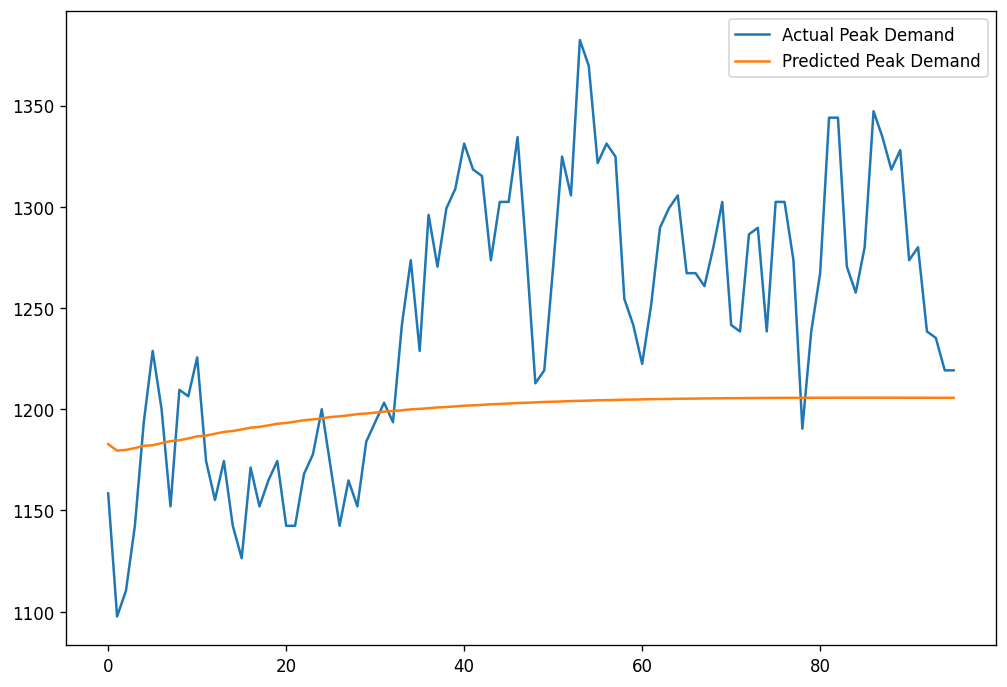

In [122]:
final_df_24 = pd.concat([pd.DataFrame(actual_np_24, columns = ['Actual Peak Demand']), pd.DataFrame(prediction_np_24, columns = ['Predicted Peak Demand'])], axis=1)
final_df_24.plot()

In [123]:
mean_absolute_error_var_24 = mean_absolute_error(final_df_24['Actual Peak Demand'], final_df_24['Predicted Peak Demand'])
mean_absolute_percentage_error_var_24 = mean_absolute_percentage_error(final_df_24['Actual Peak Demand'], final_df_24['Predicted Peak Demand'])
mse_error_var_24 = mse_error(final_df_24['Actual Peak Demand'], final_df_24['Predicted Peak Demand'])
rmse_error_var_24 = rmse_error(final_df_24['Actual Peak Demand'], final_df_24['Predicted Peak Demand'])

print('24 hrs Ahead Forecast')
print('MAPE: ' , mean_absolute_percentage_error_var_24)
print('MAE: ', mean_absolute_error_var_24)
print('MSE: ', mse_error_var_24)
print('RMSE: ', rmse_error_var_24)

24 hrs Ahead Forecast
MAPE:  4.910532296578981
MAE:  62.619017633054504
MSE:  5642.5270156139
RMSE:  75.11675589117185
